# Тестовое задание
## Python

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла **groups_add.csv** (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
from io import BytesIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Для наглядности работы функций с помощью **calculate_metrics** будут посчитаны метрики **CR и ARPPU** до загрузки дополнительных данных. Далее, функция **add_data** вернёт результат добавления новых строк в исходный датафрейм. Функцией **calculate_metrics** снова будут посчитаты метрики, но уже на изменённом датафрейме. В итоге, функция **plotting** отрисует графики метрик до и после подгрузки дополнительных данных.

#### Использую функцию get_data из первого задания для считывания данных

In [2]:
def get_data(public_key):
    # формирую URL для запроса к cloud-api.yandex.net
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    # из ответа cloud-api.yandex.net формирую URL для загрузки файла
    response = requests.get(final_url)
    download_url = response.json()['href']
    # получаю содержимое файла
    download_response = requests.get(download_url)
    return BytesIO(download_response.content)

#### Функция calculate_metrics. Рассчитывает CR и ARPUU на полученном на вход датафрейме

In [3]:
def calculate_metrics(df):
    # начальные преобразования повторяют то, что делал в первом задании
    df = df[df.id.isin(active_studs.student_id)].reset_index(drop=True)
    df = df.merge(checks, how='left', left_on='id', right_on='student_id').drop(columns='student_id')
    df['converted'] = df.rev.notna()
    # значения метрик по группа сохраняю в именованные Series
    CR = df.groupby('grp').converted.sum() / df.grp.value_counts()
    CR.name = 'CR'
    ARPPU = df.groupby('grp').rev.mean()
    ARPPU.name = 'ARPPU'
    
    # функция возвращает датафрейм с двумя метриками по группам
    return pd.concat([CR, ARPPU], axis=1)

#### Функция add_data. Добавляет к исходному датафрейму дополнительные данные и возвращает объединённый датафрейм. За счёт явного присваивания имён колонкам заголовки в дополнительном файле могут отличаться от исходных. 

In [4]:
def add_data(df):
    groups_add = pd.read_csv(get_data('https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'))
    # переименовываю названия колонок и возвращаю объединённый датафрейм
    groups_add.columns = ['id', 'grp']
    return pd.concat([df, groups_add], ignore_index=True)

#### Функция plotting. Строит два графика barplot с метриками CR и ARPPU по группам. В функции реализовано отображение значений метрик на графиках

In [5]:
def plotting(df):
    fig, axes = plt.subplots(1, 2, figsize=(9, 5))
    
    sns.barplot(x=df.CR.index, y=df.CR.values, ax=axes[0], palette='Set2')
    axes[0].set_title('CR\n', fontsize=20)
    for i, v in enumerate(df.CR.values.round(3)):
        axes[0].text(i, v, str(v), ha='center', va='bottom')
    

    sns.barplot(x=df.ARPPU.index, y=df.ARPPU.values, ax=axes[1], palette='Set2')
    axes[1].set_title('ARPPU\n', fontsize=20)
    for i, v in enumerate(df.ARPPU.values.round(2)):
        axes[1].text(i, v, str(v), ha='center', va='bottom', fontdict={'fontsize': 'large'})
       
    
    plt.tight_layout()

In [6]:
groups       = pd.read_csv(get_data('https://disk.yandex.ru/d/UhyYx41rTt3clQ'), sep=';')
active_studs = pd.read_csv(get_data('https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'))
checks       = pd.read_csv(get_data('https://disk.yandex.ru/d/pH1q-VqcxXjsVA'), sep=';')

In [7]:
groups.tail()

,id,grp
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B
74483,5694419,B


In [8]:
metrics_before = calculate_metrics(groups)
metrics_before

,CR,ARPPU
grp,,
A,0.050814,933.589744
B,0.046077,1255.827487


In [9]:
updated_groups = add_data(groups)
updated_groups.tail()

,id,grp
74571,200247820,B
74572,201032527,B
74573,201067612,B
74574,201067653,B
74575,201067659,B


In [10]:
metrics_after = calculate_metrics(updated_groups)
metrics_after

,CR,ARPPU
grp,,
A,0.050715,933.589744
B,0.046156,1257.878992


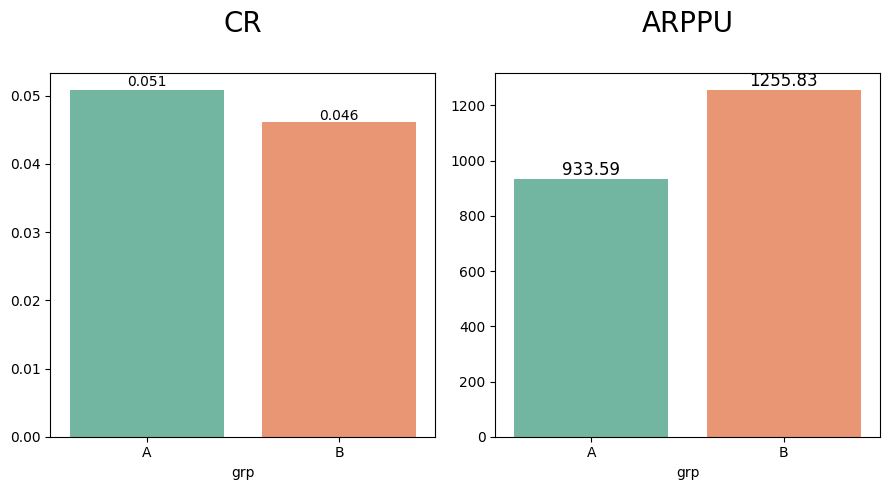

In [11]:
plotting(metrics_before)

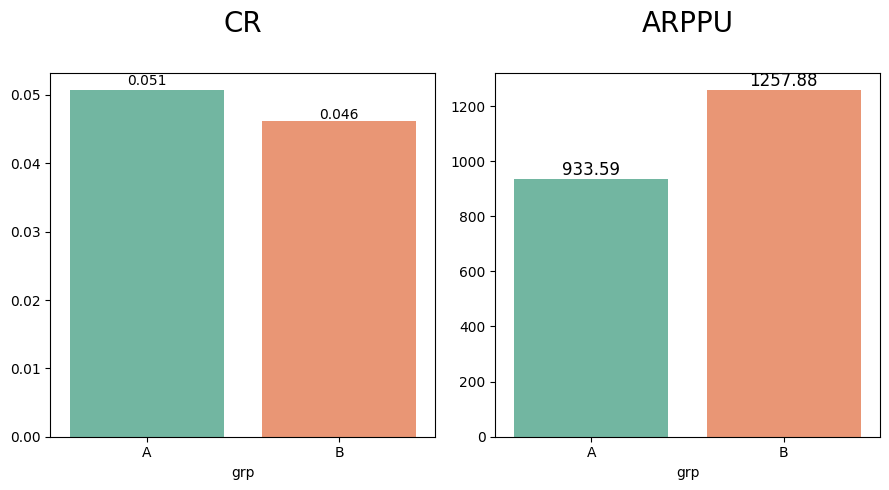

In [12]:
plotting(metrics_after)